# Two Layer Neural Network

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Import Data

(1797, 64)


<Figure size 432x288 with 0 Axes>

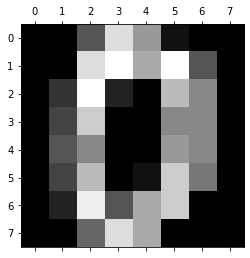

In [7]:
digits = load_digits()
print(digits.data.shape)

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

### Split Data 

In [4]:
X_full = digits.data
y_full = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3)

print("X_Train :", X_train.shape)
print("y_Train :", y_train.shape)
print("\nX_Test :", X_test.shape)
print("y_Test :", y_test.shape)

X_Train : (1257, 64)
y_Train : (1257,)

X_Test : (540, 64)
y_Test : (540,)


## Neural Network Model

**Questions**
2. should we change X by introducing 1's column for b
2. How to initilize w (Xavier initilazation) +
3. when do u nomrmalize images?
4. When do perfrom Batch normalization
5. Drop out
6. adagrad update/adam udpdate

- xavier weight initilization
- batch normalization
- adam optimizer
- model ensambles give 2% more accuracy
- Inverted drop out (Regularization) + 2%

In [5]:
def relu(x):
    return x * (x > 0)

def relu_derivative(x):
    return 1. * (x > 0)

def cross_entropy_Loss(z, y):
    predict_1 = y * np.log(z)
    predict_0 = (1 - y) * np.log(1 - z)
    
    #print("\n pred1 \n", predict_1)
    #print("\n pred0 \n", predict_0)
    
    return -sum(predict_1 + predict_0) / X.shape[0]

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

def stable_softmax(X):
    exps = np.exp(X - np.max(X))
    return exps / np.sum(exps)

def softmax_grad(softmax):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    s = softmax.reshape(-1,1)
    #print(s.shape)
    return np.diagflat(s) - np.dot(s, s.T)


def softmax2(z):
    assert len(z.shape) == 2
    s = np.max(z, axis=1)
    s = s[:, np.newaxis] # necessary step to do broadcasting
    e_x = np.exp(z - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis] # dito
    return e_x / div
    


In [8]:
aa = np.random.randn(64, 10) * np.sqrt(1. / 64.0 + 10.0)
print(aa.shape)


a_row = aa[0:1]
soft = softmax2(a_row)
print(soft)
print(np.sum(soft))


soft_full = softmax2(aa)
print(soft_full[0:1])
print(np.sum(soft_full[0:1]))
print(soft_full.shape)

aa_grad = softmax_grad(soft_full)
print(aa_grad.shape)
print("\n", (aa_grad[0:1]).shape)

(64, 10)
[[2.84650663e-02 6.40142640e-05 2.27834309e-01 5.76651535e-02
  5.44832664e-05 7.42776779e-03 4.66228147e-05 2.15977994e-03
  4.75225327e-01 2.01057477e-01]]
0.9999999999999999
[[2.84650663e-02 6.40142640e-05 2.27834309e-01 5.76651535e-02
  5.44832664e-05 7.42776779e-03 4.66228147e-05 2.15977994e-03
  4.75225327e-01 2.01057477e-01]]
0.9999999999999999
(64, 10)
(640, 640)

 (1, 640)


In [6]:
#X = np.c_[np.ones((X.shape[0],1)), X[:]]

In [7]:
class NeuralNetwork:
    def __init__(self, x, y, lr=0.00005):
        self.input      = x
        self.w1         = np.random.randn(64, 32) * np.sqrt(1. / 64.0 + 32.0)     #xavier distribution
        self.w2         = np.random.randn(32, 10) * np.sqrt(1. / 32.0 + 10.0)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.lr = lr

    def feedforward(self):
        self.layer1 = relu(self.input@self.w1)
        self.output = softmax2(self.layer1@self.w2)
        
    def backprop(self):
        self.weights2 = self.weights2 - self.lr * np.dot(self.layer1.T, (2*(self.y - self.output) * relu_derivative(self.output)))
        self.weights1 = self.weights1 - self.lr * np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * relu_derivative(self.output), self.weights2.T) * relu_derivative(self.layer1)))
        
    
    def fit(self, num_epochs=300):
        
        cost_val = []
        
        for i in range(num_epochs):
            j =  MSE_loss(self.output, y)
            cost_val.append(j)
            
            self.feedforward_relu()
            self.backprop_relu()
        return cost_val

In [8]:
X = X_train
nn = NeuralNetwork(X, y, 0.00005)
print("X", nn.input.shape)
print("w1", nn.w1.shape)
print("w2", nn.w2.shape)
print("y", nn.y.shape)
print("y_pred", nn.output.shape )

layer1 = relu(nn.input@nn.w1)
layer2 = (layer1@nn.w2)
#print(layer2[0:2])
layer2_soft = softmax2(layer1@nn.w2)
layer2_soft.shape
print(layer2_soft[0:2])


nn.feedforward()
print("\n", nn.output[0:2])


NameError: name 'y' is not defined

In [ ]:
#change y into numpy array
uq = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

y = np.zeros((X.shape[0], 10))

for i in range(0, 10):
    for j in range(0, len(y_train)):
        if y_train[j] == uq[i]:
            y[j, i] = 1

In [ ]:
X = X_train

w = np.random.normal(0, 0.01, (64, 32))

nn = NeuralNetwork(X, y, 0.00005)

print("X: ", nn.input.shape)
print("w1", nn.weights1.shape)
print("w2", nn.weights2.shape)
print("y", nn.y.shape)
print("y_pred", nn.output.shape)

#nn.feedforward_sigmoid()
#nn.backprop_sigmoid()
#nn.fit(10000)
epochs = 20
cost_val = nn.fit(epochs )

#print("y_pred", nn.output)


In [ ]:
plt.plot(range(0, epochs), cost_val, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

In [ ]:
print("y_pred", nn.output[:5])

In [ ]:
np.random.randn(64, 32)

### Calculate Accuracy

In [ ]:
def accuracy(y_pred, y):
    cnt = 0
    for i in range(y_pred.shape[0]):
        temp = 0
        ind = -1
        for j in range(10):
            if y_pred[i][j] > temp:
                temp = y_pred[i][j]
                ind = j
        if y[i][ind] == 1:
            cnt = cnt + 1

    print("accuracy: ", cnt/y_pred.shape[0])


accuracy(nn.output, y)

# Pytorch Implementation

In [9]:
pwd

'/Users/pavelshaburov/Desktop/ComputerVision'

In [10]:
%mkdir gitrepo

In [14]:
!ls gitrepo

In [15]:
ls

Convolutional Neural Network.ipynb
Linear Classifier.ipynb
Localisation + Detection.ipynb
Logistic Regression (Binary + Multiclass).ipynb
Neural Network.ipynb
Neuron.ipynb
R-CNN Practise.ipynb
data/
gitrepo/


In [19]:
ls gitrepo

two-layer-nn.ipynb


In [20]:
pwd

'/Users/pavelshaburov/Desktop/ComputerVision'

SyntaxError: invalid syntax (<ipython-input-22-f188d5ac1197>, line 1)